In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last" # all | last | last_expr | none 

In [3]:
# ============= Import required packaages ==============

from custom_classes_defs.preprocessing import *
from custom_classes_defs.Unet_like import *

# Import all custom variables and modules
#from custom_classes_defs.preprocessing import *
#from custom_classes_defs.Unet_like import *  
# from custom_classes_defs.unet import *  
# from custom_classes_defs.fnet_like import *
# from custom_classes_defs.fnet import *

RND_STATE = 247
BATCH_SIZE = 512
EPOCHS = 2

keras.utils.set_random_seed(RND_STATE)
from keras.utils import plot_model

INTERACTIVE_SESSION = True

2024-06-14 16:14:12.077279: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-14 16:14:12.547512: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-14 16:14:12.547949: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-14 16:14:12.607000: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-14 16:14:12.762649: I tensorflow/core/platform/cpu_feature_guar

In [4]:
# Verify tensorflow/keras versions
print(f"tensorflow version: {tf.__version__}")
print(f"keras version: {keras.__version__}")

# Verify CPU/GPU availability
print(tf.config.list_physical_devices())
NUM_GPU = len(tf.config.list_physical_devices('GPU'))
if NUM_GPU:
    # print GPU info
    !nvidia-smi

tensorflow version: 2.15.0
keras version: 2.15.0
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
/usr/local/bin/bash: /opt/miniconda3-py311/lib/libtinfo.so.6: no version information available (required by /usr/local/bin/bash)


Fri Jun 14 16:14:53 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 545.23.08              Driver Version: 545.23.08    CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-PCIE-40GB          On  | 00000000:3B:00.0 Off |                    0 |
| N/A   37C    P0              35W / 250W |   1637MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

|   3  NVIDIA A100-PCIE-40GB          On  | 00000000:AF:00.0 Off |                    0 |
| N/A   29C    P0              30W / 250W |      4MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+----------------------+
                                                                                         
+---------------------------------------------------------------------------------------+
| Processes:                                                                            |
|  GPU   GI   CI        PID   Type   Process name                            GPU Memory |
|        ID   ID                                                             Usage      |
|=======================================================================================|
|    0   N/A  N/A   2817296      C   ...onda/envs/detectron2-env/bin/python     1624MiB |
|    2   N

In [5]:
time_start= time.time()

seis_path = "../data_wisting/thebe/"
label_path = "../data_wisting/thebe/"

thebe = Thebe(seis_path,label_path)

# Create datasets for respective data samples and labels
x_test, y_test = thebe.data_generator(sub_group='test',as_numpy=True)
        
print("Size of test data: {}".format(thebe.test_size)) 

print('...elapsed time: ___{:5.2f} minutes___'.format((time.time()-time_start) / 60))

Size of test data: 2312
...elapsed time: ___ 0.00 minutes___


In [6]:
#if INTERACTIVE_SESSION:
#    thebe.display_sample_images(x_test, y_test, num_images=8)
#    thebe.display_sample_images(x_test, y_test, num_images=8)

In [7]:
# Model configurations
conf = model_config(
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    shuffle=True,
    scaling=1,
    save_path='./Thebe/new/unetlike',
    img_shape=thebe.img_size,
    target_size=thebe.img_size,
    threshold=thebe.threshold,
    pos_label=thebe.pos_label,
    train_size=thebe.train_size,
    test_size=thebe.test_size,
    multiple_gpu_device=(NUM_GPU>1),
    validation_size=thebe.validation_size
)

assert not(conf.new_training_session)

conf.info()

             NUM_GPU: 1
        augmentation: False
        channels_dim: (1, 1)
        compile_args:
                     optimizer: adam
                          loss: binary_crossentropy
           img_shape: (96, 96)
              labels: ListWrapper([0, 1])
     mixed_precision: None
          model_arch:
                     img_shape: (96, 96)
                   target_size: (96, 96)
                  channels_dim: (1, 1)
                       scaling: 1
                  augmentation: False
 multiple_gpu_device: False
new_training_session: False
           pos_label: 1
           save_path: ./Thebe/new/unetlike
             scaling: 1
         target_size: (96, 96)
           test_size: 2312
           threshold: 0.5
          train_size: None
       training_args:
                        epochs: 2
                    batch_size: 512
                       shuffle: True
                       verbose: 0
   training_duration: None
     validation_size: None


2024-06-14 16:15:07.687933: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 36745 MB memory:  -> device: 0, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:3b:00.0, compute capability: 8.0


In [8]:
print("\n\n{}\n\t{}\n{}".format('='*55,f'Build model', '-'*55))

if conf.multiple_gpu_device:

    print(f"Number of devices: {strategy.num_replicas_in_sync}")

m_obj = UNET2D(panel_sizes=[32,64,128,256], model_arch=conf.model_arch)
#m_obj = FNET2D(panel_sizes=[32,64,128,256], model_arch=conf.model_arch)
model = m_obj.build_model()
# model.compile(**conf.compile_args)


# model.summary()
# keras.utils.plot_model(model, 'm_obj.png',show_shapes=True)
# plot_model(model, 'm_obj.png',show_shapes=True)
num_trainable_weights = sum([np.prod(w.shape) for w in model.trainable_weights])
print(f"Total number of parameters: {model.count_params():,}")
print(f"Total trainable wieghts: {num_trainable_weights:,}")
print(f"Total non-trainable wieghts: {model.count_params()-num_trainable_weights:,}")





	Build model
-------------------------------------------------------


Total number of parameters: 2,057,825
Total trainable wieghts: 2,054,049
Total non-trainable wieghts: 3,776




	Train unet model
-------------------------------------------------------


model train history 'model+_history.pickle'loaded!
             NUM_GPU: 1
        augmentation: False
        channels_dim: (1, 1)
        compile_args:
                     optimizer: adam
                          loss: binary_crossentropy
                       metrics: accuracy
                              : f1_score(name=f1_score,dtype=float32)
           img_shape: (96, 96)
              labels: ListWrapper([0, 1])
     mixed_precision: None
          model_arch:
                     img_shape: (96, 96)
                   target_size: (96, 96)
                  channels_dim: (1, 1)
                       scaling: 1
                  augmentation: False
 multiple_gpu_device: False
new_training_session: True
           pos_label: 1
           save_path: ./Thebe/new/unetlike
             scaling: 1
         target_size: (96, 96)
           test_size: None
           threshold: 0.5
          train_size: 181029
       training_args:
                        epochs: 100
              

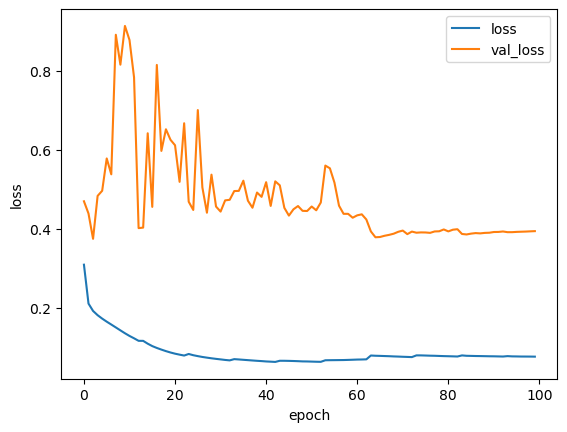

In [9]:
print("\n\n{}\n\t{}\n{}".format('='*55,f'Train {m_obj.Name} model', '-'*55))

model, train_history = \
    conf.execute_training(
        model, 
        data=None, 
        plot_history=INTERACTIVE_SESSION
)


In [10]:
print("\n\n{}\n\t{}\n{}".format('='*55,f'Evaluate {m_obj.Name} model', '-'*55))
start = time.time()
y_pred = model.predict(x_test, batch_size=BATCH_SIZE)

start = time.time() - start
print("evaluation elapsed time:___{:5.2f}___minutes" \
                .format(start/60))




	Evaluate unet model
-------------------------------------------------------


2024-06-14 16:15:29.424275: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907



1/5 [=====>........................] - ETA: 36s


3/5 [=================>............] - ETA: 0s 


5/5 [==============================] - ETA: 0s


5/5 [==============================] - 11s 381ms/step


evaluation elapsed time:___ 0.18___minutes


In [11]:
#if INTERACTIVE_SESSION:
#    thebe.display_sample_images(x_test, y_test, y_pred)

In [12]:

im_height = 1537
im_width = 3174

In [13]:
horizontal_splits_number = 67
print(horizontal_splits_number)
width_after_pad = 3312
print(width_after_pad)
left_pad = 69 
right_pad = 69
print(left_pad,right_pad)

vertical_splits_number = 33
print(vertical_splits_number)
height_after_pad = 1680
print(height_after_pad)
top_pad = 71 
bottom_pad = 72 
print(top_pad,bottom_pad)

67
3312
69 69
33
1680
71 72


In [14]:
horizontal_splits_number = horizontal_splits_number+1
print(horizontal_splits_number)
vertical_splits_number = vertical_splits_number+1
print(vertical_splits_number)

68
34


In [15]:
vertical_splits_number = 34
horizontal_splits_number= 68

In [16]:
halfoverlapsize = 24
print(halfoverlapsize)

24


In [19]:
test_predictions = y_pred

tosave = tf.stack(test_predictions).numpy()[:vertical_splits_number * horizontal_splits_number]
test_predictions = test_predictions[vertical_splits_number * horizontal_splits_number:]
print(tosave.shape)
tosave = np.reshape(tosave, (vertical_splits_number, horizontal_splits_number, 96, 96, 1))
print(tosave.shape)

recover_Y_test_pred = recover_Image(tosave, (1537, 3174, 1), left_pad, right_pad, top_pad, bottom_pad, 48)
print(recover_Y_test_pred.shape)
squeezed_ypred = np.squeeze(recover_Y_test_pred, axis=-1) 
print(squeezed_ypred.shape)
np.save('./Thebe/result/unetlike_pred_thebe.npy',squeezed_ypred)

(2312, 96, 96, 1)
(34, 68, 96, 96, 1)
(1537, 3174, 1)
(1537, 3174)


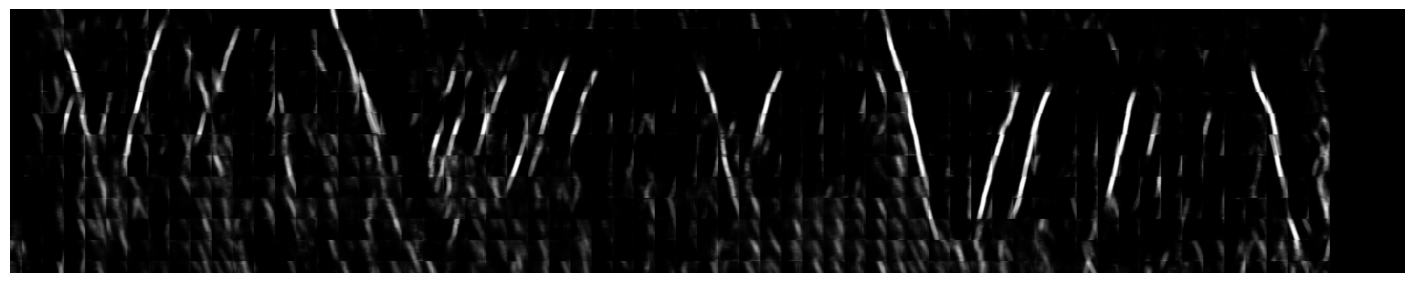

In [22]:
plt.figure(figsize=(18,18))
plt.imshow(squeezed_ypred[700:1300,:],cmap='gray')
plt.axis('off')
plt.show()

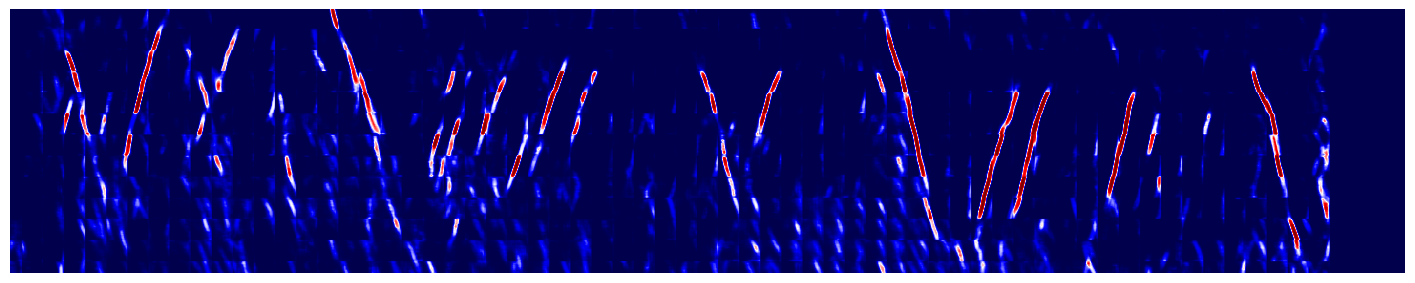

In [23]:
plt.figure(figsize=(18,18))
plt.imshow(squeezed_ypred[700:1300,:],cmap='seismic')
plt.axis('off')
plt.show()